['J', 'C', 'Q', 'W', 'V', 'Y', 'R', 'R', 'U', 'B', 'M', 'T', 'N', 'Z', 'Q', 'O', 'M', 'L', 'Z', 'P', 'Y', 'B', 'O', 'J', 'B', 'K', 'L', 'H']
['J', 'C', 'Q', 'W', 'V', 'Y', 'R', 'F', 'U', 'B', 'M', 'T', 'N', 'Z', 'Q', 'O', 'M', 'L', 'Z', 'P', 'Y', 'B', 'O', 'J', 'B', 'K', 'L', 'H']
generations: 0 fitness: 3 RWPNOPTLSFQKTSHLKJL DHQCLGRT
generations: 10 fitness: 7 XKOHERI DIGKUSFLIML FTGUMSHM
generations: 20 fitness: 9 XROHDNI DIGKUSTLIML ATFUMSNM
generations: 30 fitness: 11 XSXHONIADIT USWLIML FTGUASNM
generations: 40 fitness: 13 XSXHONIADIT ISWLIML FTRUASNL
generations: 50 fitness: 14 XSXHSNILOIT ISWLIME FTRUASNL
generations: 60 fitness: 15 XSXHSNKLDIT ISULIME FTRUASNL
generations: 70 fitness: 16 XSZHYNKMOIT ISALIME FTREASZL
generations: 80 fitness: 17 XEXHYNKVOIT ISALIHE FIREASNL
generations: 90 fitness: 18 XETHYNKVOIT ISVLICE FIREASZL
generations: 100 fitness: 18 XETHYNKXOIT ISVLIHE NFREASLL
generations: 110 fitness: 19 XETHYNKVXIT IS LICE FPREASXL
generations: 120 fitness: 20 XETHYNK

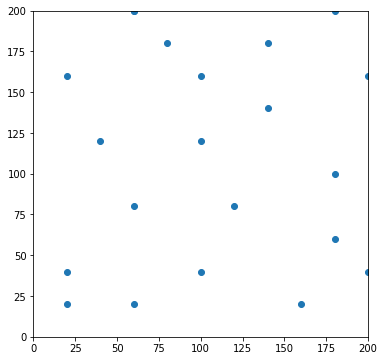

In [6]:
import matplotlib.pyplot as plt
import random
import math
import copy

%matplotlib inline

cities = {0: (60, 200), 1: (180, 200), 2: (80, 180), 3: (140, 180),
          4: (20, 160), 5: (100, 160), 6: (200, 160), 7: (140, 140),
          8: (40, 120), 9: (100, 120), 10: (180, 100), 11: (60, 80),
          12: (120, 80), 13: (180, 60), 14: (20, 40), 15: (100, 40),
          16: (200, 40), 17: (20, 20), 18: (60, 20), 19: (160, 20)}

def plot_tour(tour):
    plt.figure(figsize=(6, 6))
    xy = [cities[i] for i in tour] + [cities[tour[0]]]
    axes = plt.gca()
    axes.set_xlim([0, 200])
    axes.set_ylim([0, 200])
    plt.plot([d[0] for d in xy], [d[1] for d in xy], "-o")
    
def scatter_tour(tour):
    plt.figure(figsize=(6, 6))
    xy = [cities[i] for i in tour] + [cities[tour[0]]]
    axes = plt.gca()
    axes.set_xlim([0, 200])
    axes.set_ylim([0, 200])
    plt.scatter([d[0] for d in xy], [d[1] for d in xy])

scatter_tour(range(20))

def factorial(n):
    retval = 1
    for i in range(1, n + 1):
        retval = retval * i
    return retval

def make_tour():
    ret_list = []
    for i in range(len(cities)):
        city = random.choice(range(len(cities)))
        while city in ret_list:
            city = random.choice(range(len(cities)))
        ret_list.append(city)
    return ret_list

def distance(a, b):
    return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

def fitness(tour):
    distances = []
    for i in range(len(tour) - 1):
        dist = distance(cities[tour[i]], cities[tour[i + 1]])
        distances.append(dist)
    distances.append( distance(cities[tour[-1]], cities[tour[0]]))
    #print(distances)
    return sum(distances)

def mutate(tour):
    tour = copy.copy(tour)
    # Pick two points and swap:
    point1 = random.randint(0, len(cities) - 1)
    point2 = random.randint(0, len(cities) - 1)
    tour[point1], tour[point2] = tour[point2], tour[point1]
    return tour

target = "METHINKS IT IS LIKE A WEASEL"

"Hidden Target phrase"

import string

alphabet = string.ascii_uppercase + " "

def make_guess():
    return [random.choice(alphabet) for c in range(len(target))]

def make_pop(size):
    pop = []
    for i in range(len(target)):
        pop.append([0, make_guess()])
    return pop

def mutate(guess):
    guess = copy.copy(guess)
    point = random.randint(0, len(target) - 1)
    guess[point] = random.choice(alphabet)
    return guess
    
def fitness(guess):
    return sum([guess[i] == target[i] for i in range(len(target))])

def select(pop):
    index = 0
    partsum = 0.0
    sumFitness = sum([item[0] for item in pop])
    if sumFitness == 0:
        raise Exception("Population has a total of zero fitness")
    spin = random.random() * sumFitness
    while index < len(pop) - 1:
        fitness = pop[index][0]
        if fitness < 0:
            raise Exception("Negative fitness in select: " + str(fitness))
        partsum += fitness
        if partsum >= spin:
            break
        index += 1
    return copy.copy(pop[index][1])

def crossover(pop):
    for j in range(int(len(pop)/2)):
        p1 = select(pop)
        p2 = select(pop)
        point = random.randint(0, len(target) - 1)
        child = []
        for i in range(len(target)):
            if i < point:
                child.append(p1[i])
            else:
                child.append(p2[i])
        pop[len(pop) - j - 1][1] = child

guess = make_guess()
"".join(guess)

pop = make_pop(10)

pop[0]

guess = make_guess()
print(guess)
print(mutate(guess))

fitness(pop[0][1])

def evolve(pop):
    generations = 0
    while True:
        for i in range(len(pop)):
            pop[i][0] = fitness(pop[i][1])
        pop.sort(reverse=True)
        if pop[0][0] == len(target):
            break
        for i in range(2, 10): # not the top 20%
            pop[i][1] = mutate(pop[i][1])
        crossover(pop)
        if generations % 10 == 0:
            print("generations:", generations, "fitness:", pop[0][0], "".join(pop[0][1]))
        generations += 1
    print("generations:", generations, "fitness:", pop[0][0], "".join(pop[0][1]))


pop = make_pop(10)
evolve(pop)